# 2章 PyTorch入門
# 2. Introduction of PyTorch

In [1]:
# 必要ライブラリのインポート
# Import required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [2]:
# デフォルトフォントサイズ変更
# Set default font size
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
# Set default graph size
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
# Show grid
plt.rcParams['axes.grid'] = True

## 2.2 テンソル
## 2.2 Tensor

### ライブラリインポート
### Import library

In [3]:
# PyTorchライブラリ
# Pytorch library
import torch

### いろいろな階数のTensorを作る
### Create tensors of various ranks

In [4]:
# 0階テンソル (スカラー)
# Rank 0 tensor (scalar)
# dtypeからfloat32に変換するのを忘れないように。
# もし忘れたらnumpyに自動で変換され、いくつかのライブラリが動かない
# Don't be forget to convert from dtype to float32. 
# If you forgot this about NumPy variable, dtype will be converted to float64, and some Libraries doesn't work it. 
r0 = torch.tensor(1.0).float()

# typeを調べる
# Show type
print(type(r0))

# dtypeを調べる
# Show dtype
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


In [5]:
# shapeを調べる
# Show shape
print(r0.shape)

# データを調べる
# Show data
print(r0.data)

torch.Size([])
tensor(1.)


In [6]:
# 1階テンソル (ベクトル)
# Rank 1 tensor (vector)

# 1階のNumPy変数作成
# Create rank 1 NumPy variable
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

# NumPyからテンソルに変換
# Convert from NumPy to tensor
r1 = torch.tensor(r1_np).float()

# dtypeを調べる
# Show dtype
print(r1.dtype)

# shapeを調べる
# Show shape
print(r1.shape)

# データを調べる
# Show data
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [7]:
# 2階テンソル (行列)
# Rank 2 tensor (matrix)

# 2階のNmPy変数作成
# Create rank 2 Numpy variable
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

# NumPyからテンソルに変換
# Convert from NumPy to tensor
r2 = torch.tensor(r2_np).float()

# shapeを調べる
# Show shape
print(r2.shape)

# データを調べる
# Show data
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [8]:
# ３階テンソル
# Rank 3 tensor

# 乱数seedの初期化
# Initialize a random seed
torch.manual_seed(123)

# shape=[3,2,2]の正規分布変数テンソルを作る
# Create a normal distributed variable tensor with shape=[3, 2, 2]
r3 = torch.randn((3, 2, 2))     # randn sets normal distributeed random numbers (average:0, variance:1) to elements

# shapeを調べる
# Show shape
print(r3.shape)

# データを調べる
# Show data
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [9]:
# 4階テンソル
# Rank 4 tensor

# shape=[2,3,2,2]の要素がすべて1のテンソルを作る
# Create tensor with shape=[2, 3, 2, 2] and all elements of it are 1
r4 = torch.ones((2, 3, 2, 2))      # function ones sets 1.0 to all elements

# shapeを調べる
# Show shape
print(r4.shape)

# データを調べる
# Show data
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


### 整数型テンソルを作る
### Create tensor of integer

In [10]:
# r1 is a rank 1 tensor that has float32 data
# This tensor is converted torch.int64 by long function 
r5 = r1.long()

# dtypeを確認
# Show dtype
print(r5.dtype)

# 値を確認
# Show value
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


### view関数
### view function

In [11]:
# 2階化
# 要素数に-1を指定すると、この数を自動調整する
# How to convert other rank like reshape of NumPy
# Convert to rank 2 from rank 3 
# Set -1 to only an element, then it will be automatically tuned.
r6 = r3.view(3, -1)

# shape確認
# Show shape

# In this case, the number of r3 elements is 12 ([3, 2, 2]:3*2*2=12)
# And the number of r6 elements will be tuned to match 12, so r6.shape will be [3, 4]([3, x]:3*x=12)
print(r6.shape)

# 値確認
# Show data
print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [12]:
# 1階化
# 要素数に-1を指定すると、この数を自動調整する
# How to convert other rank like reshape of NumPy
# Convert to rank 1 from rank 3 
# Set -1 to only an element, then it will be automatically tuned.
r7 = r3.view(-1)

# shape確認
# Show shape
# In this case, the number of r3 elements is 12 ([3, 2, 2]:3*2*2=12)
# And the number of r6 elements will be tuned to match 12, so r7.shape will be [12]([12]:x=12)
print(r7.shape)

# 値確認
# Show data
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


### Other attriburtes
### それ以外の属性

In [13]:
# requires_grad属性
# Requires_grad
print('requires_grad: ', r1.requires_grad)

# device属性
# device
print('device: ', r1.device)

requires_grad:  False
device:  cpu


### item関数
### item function

In [14]:
# スカラーテンソル(0階テンソル)に対してはitem関数で値を取り出せる
# item function can get value of class with scaler tensor (rank 0)

item = r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [15]:
# ここの出力はエラーが出るのが正しいです
# It's correct to output error here

# 0階以外のテンソルにitem関数は無効
# Be careful with item function. It can only use rank 0 tensor.

print(r1.item())

RuntimeError: a Tensor with 5 elements cannot be converted to Scalar

In [16]:
# 要素数が1つだけの1階テンソルはOK(2階以上でも同様)
# When the number of elements is only one, it's OK to use rank more than 1 tensor.
# example: shape is [1], or [1, 1]
t1 = torch.ones(1)

# shape確認
# show shape
print(t1.shape)

# item関数呼び出し
# call item function
print(t1.item())

torch.Size([1])
1.0


### max関数
### max function

In [17]:
# 元テンソルr2の確認
# Show original tensor r2 (shape is [2, 3])
print(r2)

# max関数を引数なしで呼び出すと、全体の最大値が取得できる
# Call max function without argument, and it will be able to get a maximum value from all elements
print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [18]:
# torch.max関数
# torch.max function

# 2つめの引数はどの軸で集約するかを意味する
# Second augument means which axis do you want to select

# The case of rank 2 : axis=1 is row, axis=0 is column
print(torch.max(r2, 1))
print(torch.max(r2, 0))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))
torch.return_types.max(
values=tensor([4., 5., 6.]),
indices=tensor([1, 0, 0]))


In [19]:
# 何番目の要素が最大値をとるかは、indicesを調べればいい
# You can find out which order takes the maximum value by showing indices.
# You can get only indices with putting [1] to "print(torch.max(r2, 1))"

# 以下の計算は、多値分類で予測ラベルを求めるときによく利用されるパターン
# The following calculation is a pattern that is often used when obtaining predicted labels in multi-level classification. 
print(torch.max(r2, 1)[1])

tensor([2, 0])


### NumPy変数への変換
### Convert to NumPy variable

In following example, the tensor variable and the NumPy array are pointed same data, so use .copy() if you need.

(More details are explained in 1.2)

In [20]:
# numpy化
# Convert to NumPy
r2_np = r2.data.numpy()

# type確認
# Show type
print(type(r2_np))

# 値確認
# Show value
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


## 2.4 ２次関数の勾配計算
## 2.4 Gradient calculation of quadratic function

### データ準備
### Preparating data

In [21]:
# xをnumpy配列で定義
# Define x with NumPy array
x_np = np.arange(-2, 2.1, 0.25)

# xの値表示
# Show the value of x
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


### (1) 勾配計算用変数の定義
### (1) The definition of variable for gradient calculation

In [22]:
# (1) 勾配計算用変数の定義
# (1) The definition of variable for gradient calculation

x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)     # Set requires_grad = True

# 結果確認
# Show result
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


About "dtype=torch.float32"

Here we are specifying a dtype parameter instead of calling the float function.

This is because when the float function is called, the copy function is called as a computation graph, and x is no longer a leaf node that can calculate the gradient value.

In normal machine learning, the parameters are differentiated instead of x, so this is only supported this time.

### (2) ２次関数の計算
### (2) Calculate quadratic function

In [23]:
# (2) 2次関数の計算
# (2) Calculate quadratic function

# 裏で計算グラフが自動生成される
# Computation graph is automatically generated
y = 2 * x**2 +2

# yの計算結果確認
# Show the result of calculation of y
print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


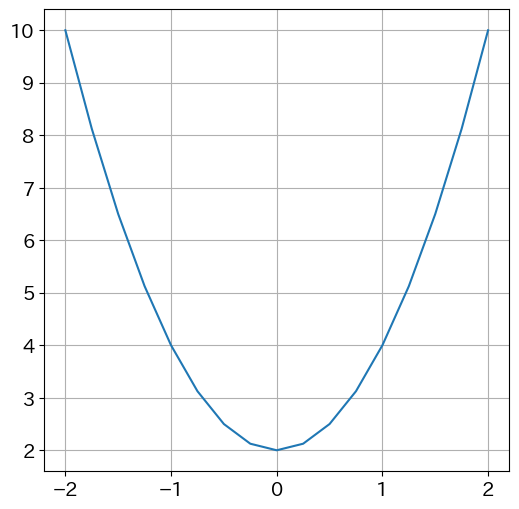

In [24]:
# グラフ描画
# Show scatter plot

plt.plot(x.data, y.data)
plt.show()

In [26]:
# 勾配計算のため、sum 関数で 1階テンソルの関数値をスカラー化する
# For gradient calculation, convert function value of rank 1 tensor to scalar with sum function

# (sum 関数を各要素で偏微分した結果は1なので、元の関数の微分結果を取得可能 ) 
# (You can get the result of defferentiation of the original function, 
# because result of partial differentiation of the sum function with respect to each element is 1)

# ( 詳細はサポートサイトの解説を参照のこと )
# (For details, refer to the explanation on the support site)

z = y.sum()

### (3) 計算グラフの可視化
### (3) Visualization of computational graphs

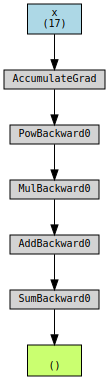

In [27]:
# (3) 計算グラフの可視化
# (3) Visualization of computational graphs

# 必要ライブラリのインポート
# import required library
from torchviz import make_dot

# 可視化関数の呼び出し
# Call the visualization function
g = make_dot(z, params={'x': x})
display(g)

x: Leaf node. Variables for which gradient values ​​can be calculated. (17) is shape and it means rank 1 and 17 dimensions.

AccumulateGrad: This is where to store gradient values.
 
PowBackword0: Call exponential function (x**2)

MulBackword0: Call multiplication function (2 * x**2)

AddBackword0: Call add function (2 * x**2 + 2)

SumBackword0: Call sum function (create scalar z from y)

(): Output. () is shape and it means rank 0 and scalar 

### (4) 勾配計算
### (4) Gradient calculation

In [28]:
# (4) 勾配計算
# (4) Gradient calculation

z.backward()

### (5) 勾配値の取得
### (5) Get the gradient value

In [29]:
# (5) 勾配値の取得
# (5) Get gradient values
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


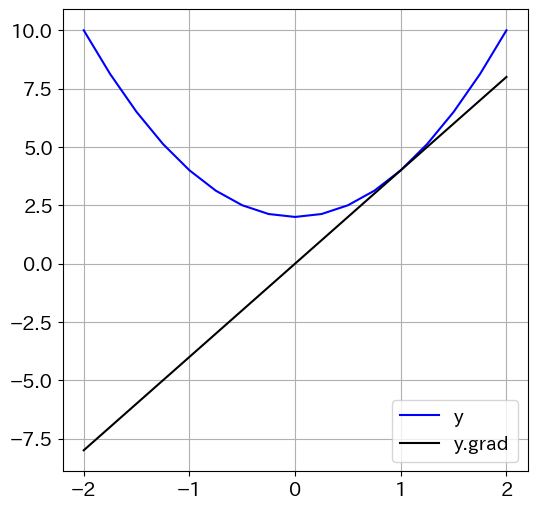

In [30]:
# 元の関数と勾配のグラフ化
# Show graph of the original function and gradient

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

元の関数が2次関数なので、勾配計算の結果が直線になるのは、妥当な結果

Since the original function is a quadratic function, it is reasonable that the result of the gradient calculation is a straight line.

### (6) 勾配値の初期化
### (6) Initialize gradient values

ここでもう一度勾配計算をしてみる。

Here let's calculate gradient again.

In [31]:
# 勾配の初期化せずに２度目の勾配計算
# Second gradient computation without gradient initialization

# x.gradがこれまでの結果を保持するので悪い例
# This is bad example because x.grad keeps results so far

y = 2 * x**2 + 2
z = y.sum()
z.backward()

# xの勾配確認
# Show gradient of x
print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


勾配値は、勾配計算の結果がどんどん加算されてしまう。そのため新しい値を計算したい場合、勾配値のリセットが必要。

As for the gradient value, the result of the gradient calculation is added more and more. So if you want to calculate a new value, you need to reset the gradient value.

In [32]:
# (6) 勾配値の初期化は関数zero_()を使う
# (6) Initialize gradient values with zero_() function

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## 2.5 シグモイド関数の勾配計算
## 2.5 Gradient calculation of sigmoid function

シグモイド関数は数式で表すと次の形になるが今回はPyTorchで提供されている関数を利用する  

The sigmoid function can be experssed in the following form, but this time, we will use the function provided by PyTorch.  
$ y = \dfrac{1}{1 + \exp{(-x)}} $

In [33]:
# シグモイド関数の定義
# The definition of sigmoid function
sigmoid = torch.nn.Sigmoid()

In [34]:
# (2) yの値の計算
# (2) Calculate value of y
y = sigmoid(x)

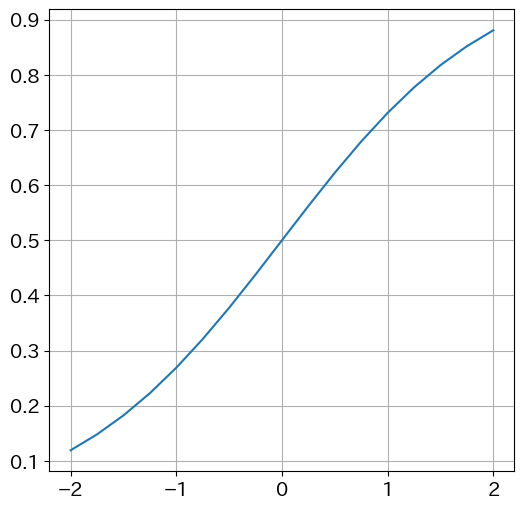

In [35]:
# グラフ描画
# Show scatter plot
plt.plot(x.data, y.data)
plt.show()

### 最終結果をスカラーに加工する
### Processing that scalarizes the final result

In [36]:
# 勾配計算のためには、最終値はスカラーの必要があるため、ダミーでsum関数をかける
# For the gradient calculation, the final value must be a scalar, so a dummy sum function is applied
z = y.sum()

### (3) 計算グラフの可視化
### (3) Visualization of computational graph

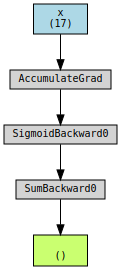

In [37]:
# (3) 計算グラフの可視化
# (3) Visualizaion of computational graph
g = make_dot(z, params={'x': x})
display(g)

In [38]:
# (4) 勾配計算
# (4) gradient calculation
z.backward()

# (5) 勾配値の確認
# (5) Show gradient value
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


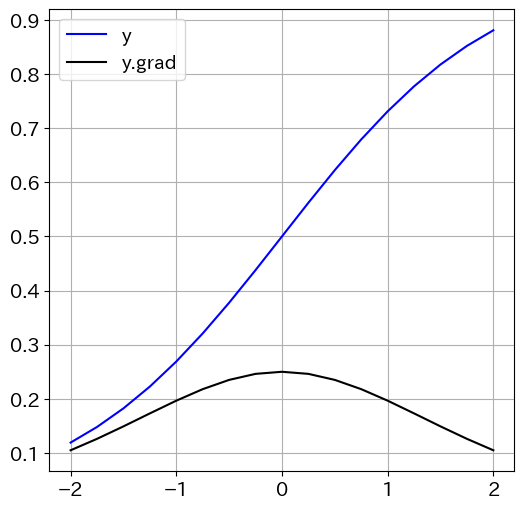

In [39]:
# 元の関数と勾配のグラフ化
# Show original graph and gradient

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

シグモイド関数の勾配は、$y(1-y)$になる。  

The gradient of sigmoid function is $y(1-y)$ .

2次関数なので、$y=\dfrac{1}{2}$の時(x=0の時)最大値$\dfrac{1}{4}$を取る。  

This is quadratic function, so when it is $y=\dfrac{1}{2}$ (x=0), it takes muximum value $\dfrac{1}{4}$.

上のグラフは、この計算結果と一致している。  

The graph above is consistent with this result.

In [40]:
# (6) 勾配値の初期化は関数zero_()を使う
# (6) Initialize gradient values with zero_() function

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


### (参考) シグモイド関数を独自に実装した場合
### (Reference) An example of a manually implementation of the sigmoid function 

In [41]:
# シグモイド関数の定義
# The definition of sigmoid function
def sigmoid(x):
    return(1/(1 + torch.exp(-x)))

In [42]:
# (2) yの値の計算
# (2) Calculate the value of y
y = sigmoid(x)

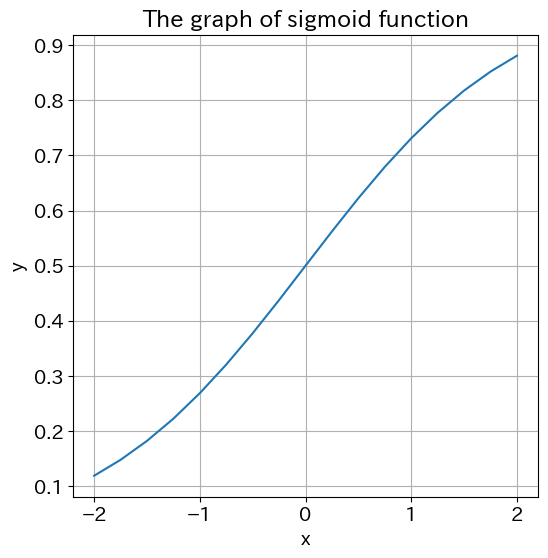

In [43]:
# グラフ描画
# Show scatter graph
plt.plot(x.data, y.data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('The graph of sigmoid function')
plt.show()

In [44]:
# 勾配計算のためには、最終値はスカラーの必要があるため、ダミーでsum関数をかける
# For the gradient calculation, the final value must be a scalar, so a dummy sum function is applied
z = y.sum()

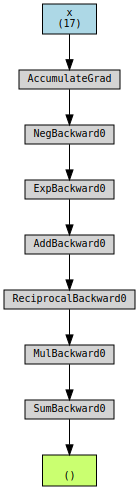

In [45]:
# (3) 計算グラフの可視化
# (3) Visualization of computational graph
params = {'x': x}
g = make_dot(z, params=params)
display(g)

In [46]:
# Reset x.grad
x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [47]:
# (4) 勾配計算
# (4) Gradient calculation
z.backward()

# (5) 勾配値の確認
# (5) Show gradient value
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


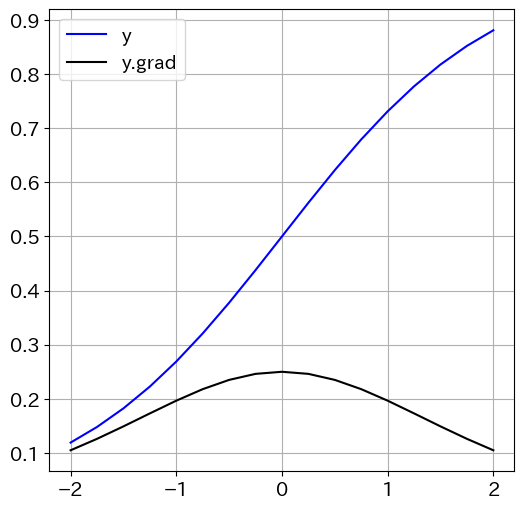

In [48]:
# 元の関数と勾配のグラフ化
# Show original function and gradient
plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()